<a href="https://colab.research.google.com/github/aditiitomar/Plant-Disease-Prediction/blob/main/Plant_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a Neural Network which is able to identify disease in a plant.

In [3]:
# Linking kaggle dataset with google colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow version: 2.15.0
GPU is available


In [7]:
!nvidia-smi

Sat Jun  1 13:34:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
# data preprocessing
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred", #select name of the directory(train) as label
    label_mode="categorical", #this model will choose one category out of 38 provided
    class_names=None,
    color_mode="rgb",
    batch_size=32, #at a time we'll feed 32 images to neural network
    image_size=(128, 128),
    shuffle=True, #to reduce biasness of model
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [9]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [10]:
# CNN
# Input image--> convolutions --> Pooling --> fully connected
# convolutions reduce the size of images to important features

# building model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model= Sequential()

# building Convolution Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=65,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.4))

In [16]:
# flattening process
model.add(Flatten())

In [17]:
model.add(Dropout(0.25))

In [18]:
# hidden layer
model.add(Dense(units=1500,activation='relu'))

In [19]:
# output layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
# compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
# visualizing entire parameter of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 65)        37505     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 65)        0         
 g2D)                                                   

In [22]:
# model training
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 173s 73ms/step - loss: 1.3784 - accuracy: 0.5891 - val_loss: 0.4816 - val_accuracy: 0.8446
Epoch 2/10
2197/2197 [==============================] - 170s 78ms/step - loss: 0.4575 - accuracy: 0.8549 - val_loss: 0.3084 - val_accuracy: 0.8987
Epoch 3/10
2197/2197 [==============================] - 171s 78ms/step - loss: 0.2813 - accuracy: 0.9095 - val_loss: 0.2406 - val_accuracy: 0.9221
Epoch 4/10
2197/2197 [==============================] - 161s 73ms/step - loss: 0.1945 - accuracy: 0.9361 - val_loss: 0.1769 - val_accuracy: 0.9413
Epoch 5/10
2197/2197 [==============================] - 161s 73ms/step - loss: 0.1476 - accuracy: 0.9506 - val_loss: 0.1505 - val_accuracy: 0.9503
Epoch 6/10
2197/2197 [==============================] - 160s 73ms/step - loss: 0.1131 - accuracy: 0.9624 - val_loss: 0.1623 - val_accuracy: 0.9492
Epoch 7/10
2197/2197 [==============================] - 160s 73ms/step - loss: 0.0952 - accuracy: 0.9697 - val_loss: 0

In [23]:
# model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 54s 25ms/step - loss: 0.0249 - accuracy: 0.9918


In [24]:
print(train_loss,train_acc)

0.02492382749915123 0.9917774796485901


In [25]:
# model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 16s 28ms/step - loss: 0.0940 - accuracy: 0.9705


In [26]:
print(val_loss,val_acc)

0.09402327984571457 0.9705212712287903


In [27]:
# saving model
model.save("trained_model.keras")

In [28]:
training_history.history

{'loss': [1.3784313201904297,
  0.45747360587120056,
  0.28125259280204773,
  0.19448505342006683,
  0.14755457639694214,
  0.11309807747602463,
  0.09516870975494385,
  0.08293382078409195,
  0.06933000683784485,
  0.06122212111949921],
 'accuracy': [0.5890888571739197,
  0.8549114465713501,
  0.9094957113265991,
  0.9360694289207458,
  0.9506081342697144,
  0.9623870849609375,
  0.969684898853302,
  0.9737250208854675,
  0.9778220653533936,
  0.9801408648490906],
 'val_loss': [0.4815673530101776,
  0.3083612024784088,
  0.24056784808635712,
  0.17685426771640778,
  0.15049974620342255,
  0.1622878909111023,
  0.11790138483047485,
  0.07935639470815659,
  0.1174907311797142,
  0.09402325749397278],
 'val_accuracy': [0.8446391820907593,
  0.8987025022506714,
  0.9221488833427429,
  0.9412702322006226,
  0.9502617716789246,
  0.949180543422699,
  0.9622126221656799,
  0.9746187329292297,
  0.9636922478675842,
  0.9705212712287903]}

In [29]:
# recording history in JSON
import json
with open("training_hist","w") as f:
  json.dump(training_history.history,f)


In [30]:
training_history.history['accuracy']

[0.5890888571739197,
 0.8549114465713501,
 0.9094957113265991,
 0.9360694289207458,
 0.9506081342697144,
 0.9623870849609375,
 0.969684898853302,
 0.9737250208854675,
 0.9778220653533936,
 0.9801408648490906]

In [31]:
training_history.history['val_accuracy']

[0.8446391820907593,
 0.8987025022506714,
 0.9221488833427429,
 0.9412702322006226,
 0.9502617716789246,
 0.949180543422699,
 0.9622126221656799,
 0.9746187329292297,
 0.9636922478675842,
 0.9705212712287903]

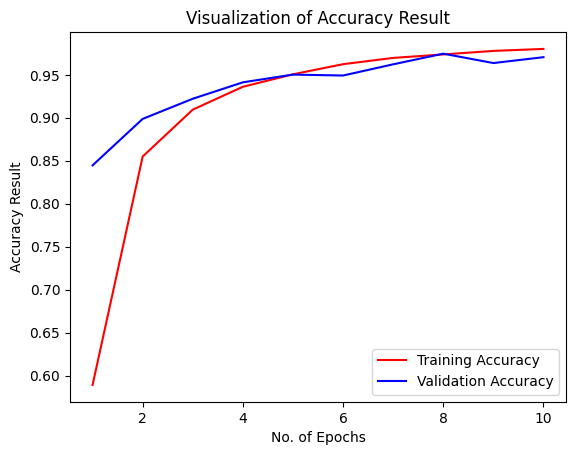

In [32]:
# accuracy visualization
# training & validation accuracy
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [33]:
# some other metrics for model evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [35]:
# prediction
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 14s 26ms/step


(array([[1.0000000e+00, 4.3724993e-10, 5.7538982e-12, ..., 9.6293729e-19,
         6.9098513e-17, 5.1182889e-15],
        [9.9997866e-01, 8.8114211e-06, 4.1217416e-09, ..., 1.0743896e-14,
         2.8813879e-13, 2.1035640e-11],
        [1.0000000e+00, 4.2329651e-09, 2.8026567e-10, ..., 6.8580923e-17,
         1.7350982e-14, 3.0292281e-13],
        ...,
        [1.8934298e-08, 3.1648345e-10, 4.0368793e-08, ..., 1.0128500e-08,
         2.6864537e-09, 9.9992049e-01],
        [1.9295990e-10, 1.0005635e-12, 1.7688968e-10, ..., 8.6715607e-11,
         6.7526804e-12, 9.9999917e-01],
        [6.6384493e-17, 1.0473219e-18, 2.6843488e-15, ..., 1.4315926e-15,
         1.0202057e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.98      0.

In [40]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

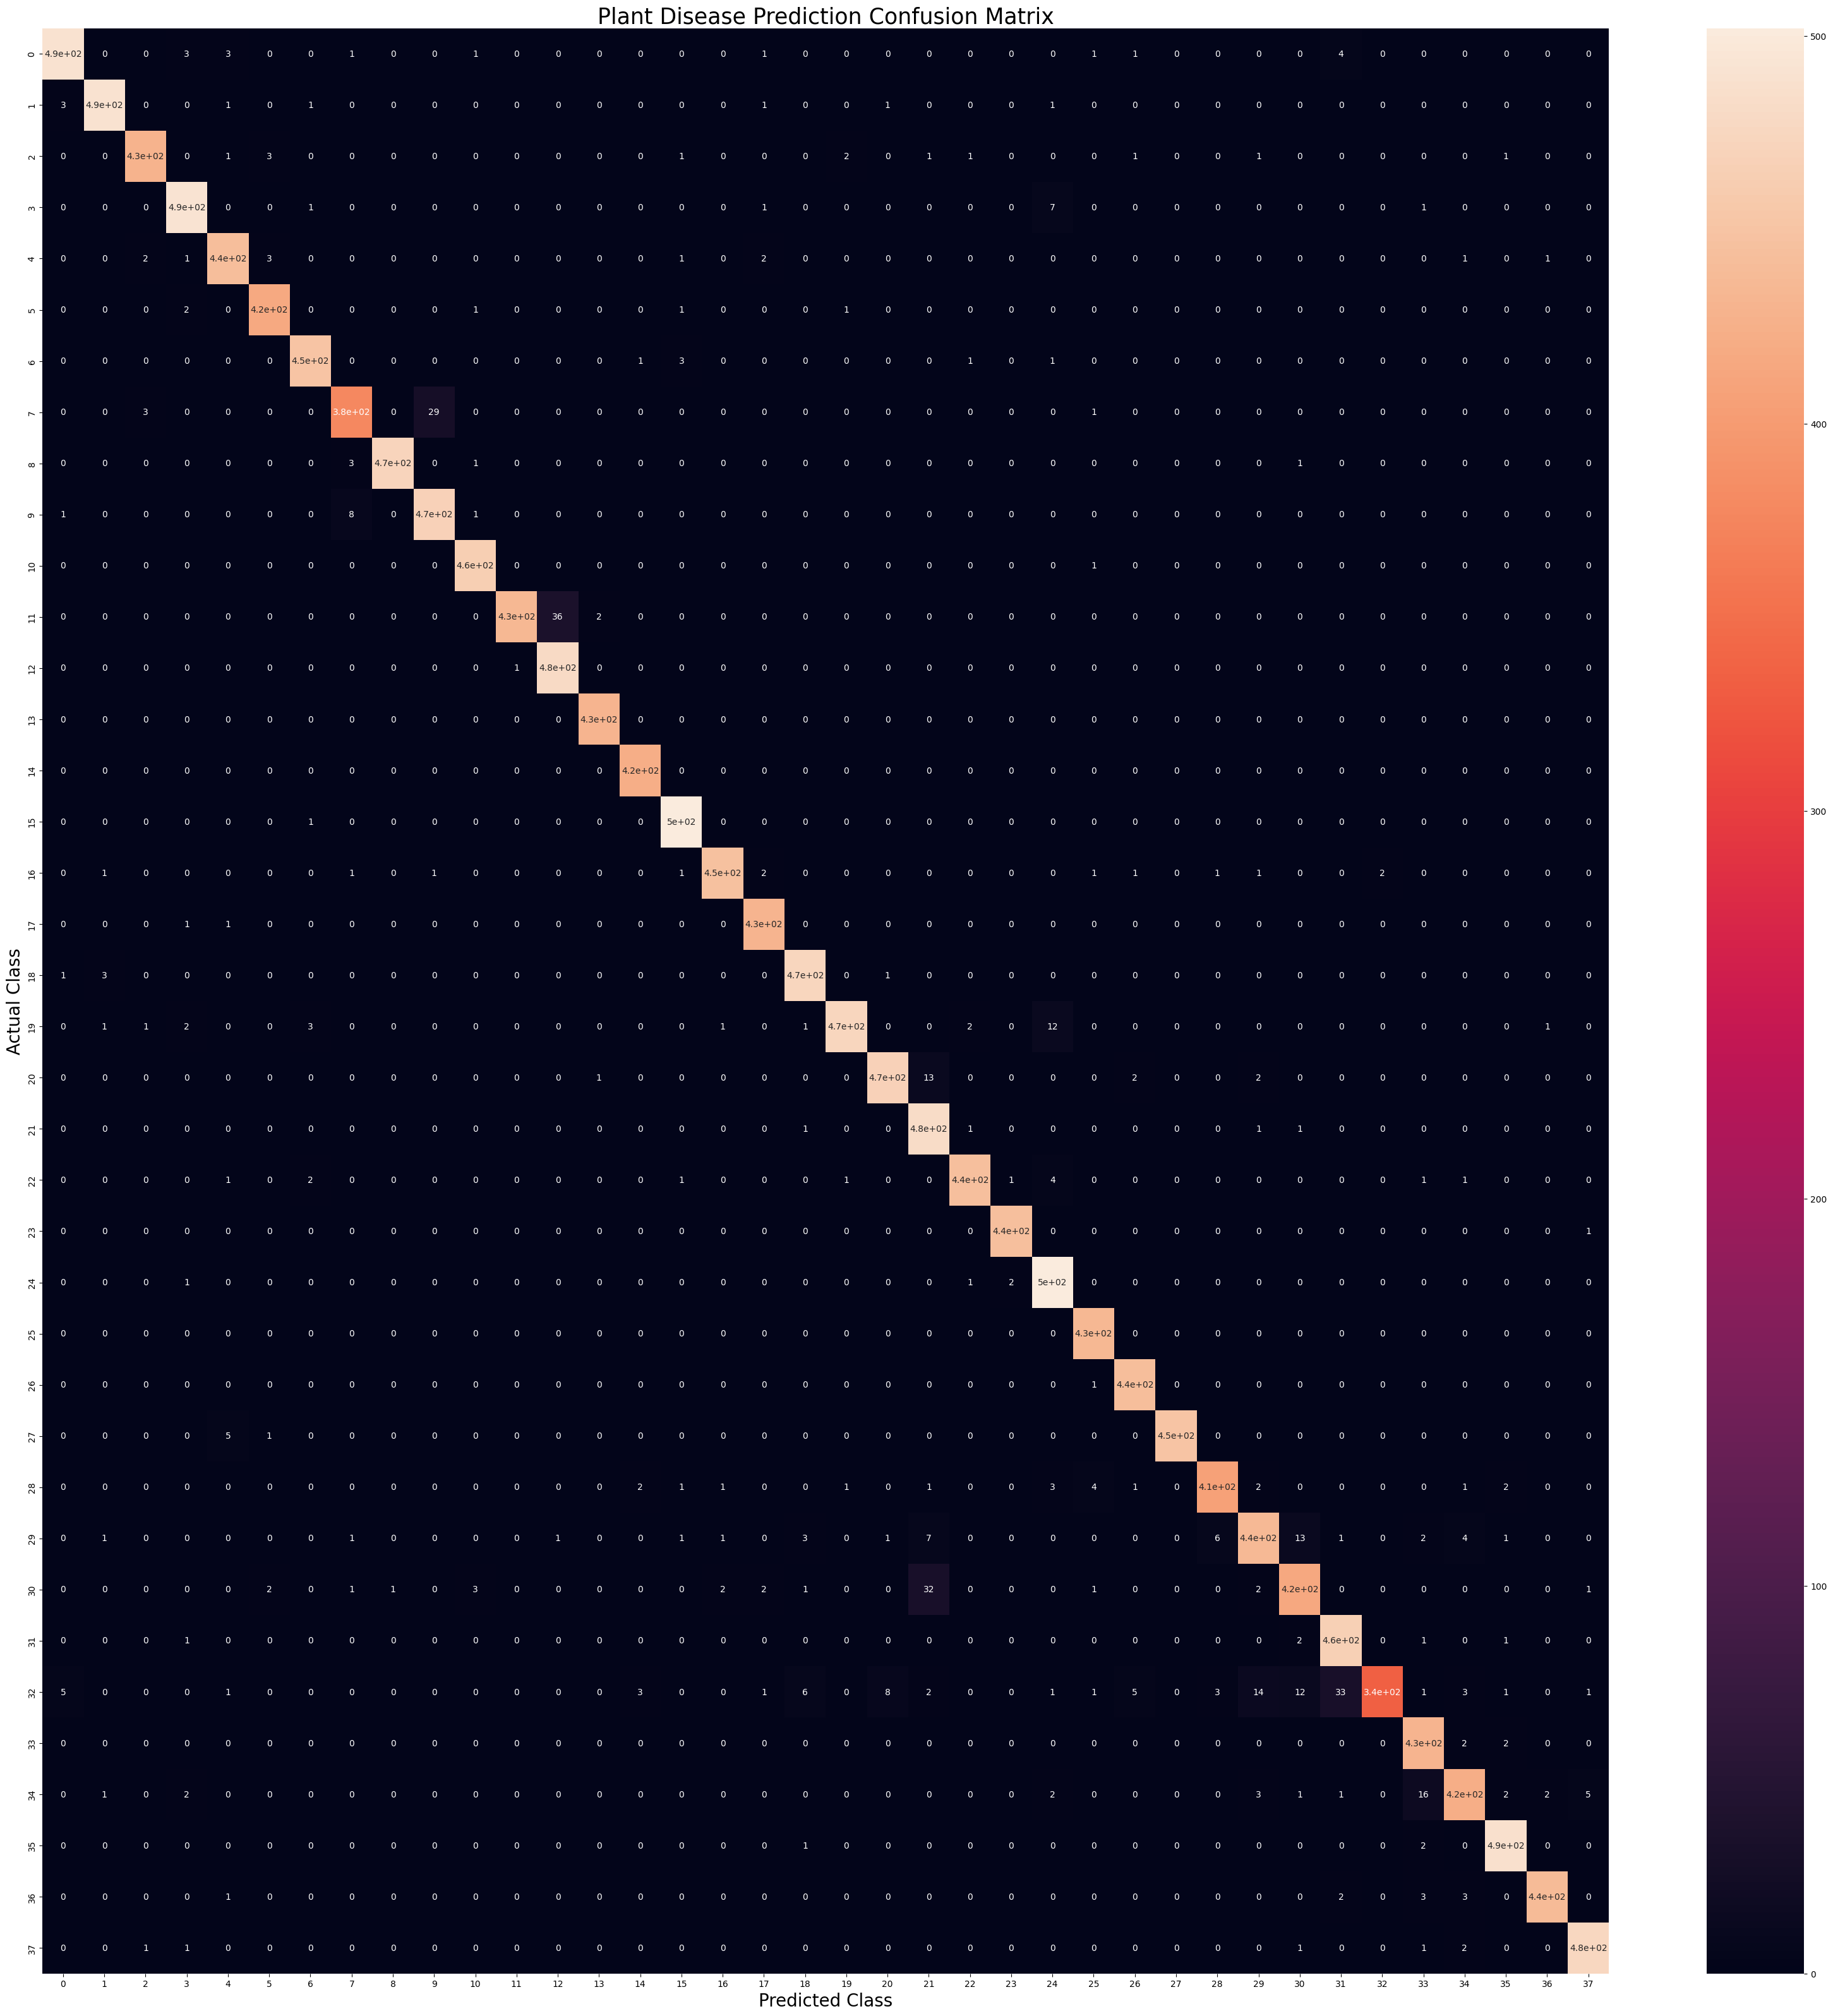

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()